# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [2]:
# import dependencies
import pandas as pd

# loading the data into a dataframe
Sales_DF = pd.read_csv('Resources\Sales_Data.csv')

Sales_DF.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge / Scope
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

### Data Cleaning and preparation



In [3]:
# Looking for missing values in the dataset
Sales_DF.count() # 1000 records present in each column

# Looking for duplicate records
Sales_DF.drop_duplicates(inplace=True)

Sales_DF.shape # looks like no duplicate records are present

(1000, 8)

### Sales by Payment Method

In [4]:
# Group the sales by payment method
Payment_DF = Sales_DF.groupby(['payment'])

# Sum all of the sales by payment type
Sales_By_Payment = Payment_DF['total'].sum()

# Converting into values relative to the total number of sales
Prct_Sales = (Sales_By_Payment / Sales_By_Payment.sum()) * 100

<AxesSubplot:title={'center':'Sales By Payment Type'}, ylabel='Total Sales'>

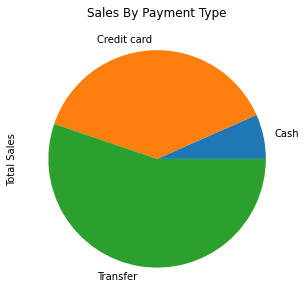

In [5]:
# Plotting the total sales by payment using a pie chart
Prct_Sales.plot.pie(title = 'Sales By Payment Type' , figsize = (5,5) , ylabel = 'Total Sales')

### Insights
* Tha majority of sales were completed using transfers
* Cash was the payment type used the least

### Average Price per Product Line

In [23]:
#There are six unique product lines in this database
print(len(Sales_DF['product_line'].unique()))

# Group by product line
Product = Sales_DF.groupby(['product_line'])

# Computing the mean unit price per product line
avg_unit_price = Product['unit_price'].mean()
print(avg_unit_price)

6
product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64


<AxesSubplot:title={'center':'Average unit price by Product Line'}, xlabel='Product Line', ylabel='Price'>

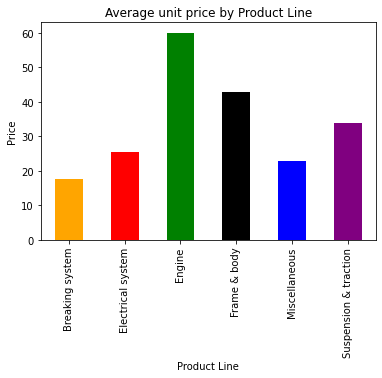

In [31]:
# Plotting the average price using a bar chart
avg_unit_price.plot.bar(title = 'Average unit price by Product Line' , color = ['orange', 'red' , 'green' , 'black' , 'blue' , 'purple']
, xlabel = 'Product Line' , ylabel = 'Price')

### Insights
* The Product line with the highest average unit price is the engine
* The product line with the smallest cost per unit are products belonging to the breaking system

### Total Sales by Warehouse Location

<AxesSubplot:title={'center':'Total Sales Per Warehouse'}, ylabel='total'>

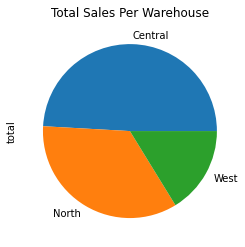

In [37]:
# Group the dataframe by warehouse location
Sales_By_Warehouse = Sales_DF.groupby(['warehouse'])

# summing the sales by warehouse location
Warehouse_Total = Sales_By_Warehouse['total'].sum()

# Representing data as pie chart
Warehouse_Total.plot.pie(title = 'Total Sales Per Warehouse')


### Insights
* The Central region contains the bulk of the sales in this datasest
* The regions supported by the West warehouse show the weakes sales
* Analysis on the sales in the regions supported by the West warehouse may reveal why performance is poor